## Comprehensive data analysis and predictive modeling with IBM HR Analytics data set . 

### Extensive hyperparameter tuning for RandomForest and XGBoost

### Introduction

The data set was obtained from Kaggle.
  [IBM HR Analytics Data Set](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)  
  The data set was uploaded by [Pavan Subhash](https://www.kaggle.com/pavansubhasht)  
  
  This is a fictional data set created by IBM data scientists.
  Such a data set will help us uncover the factors that lead to an employee leaving the company.  
  This is binary classification problem, and I have used Logistic Regression, RandomForest, and XGBoost to build predictive  models.
  Extensive hyperparameter tuning has been performed for all the models.  
  More there is class imbalance in the data set.  
  I have used SMOTE ( oversampling the minority class), and also created a balanced data set that contained equal number of 1s and 0s. The The predictive models were built separately on these datasets.  
  
### Acknowledgement

  Initially I studied the notebook [Employee attrition via Ensemble tree-based methods](https://www.kaggle.com/arthurtok/employee-attrition-via-ensemble-tree-based-methods) by [Anisotropic](https://www.kaggle.com/arthurtok)

In [1]:
! pip install imbalanced-learn
! pip install xgboost

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import xgboost

import warnings
warnings.filterwarnings('ignore')

    100% |████████████████████████████████| 174kB 12.7MB/s 
    100% |████████████████████████████████| 6.7MB 7.9MB/s 
    100% |████████████████████████████████| 286kB 51.8MB/s 
scikit-umfpack 0.3.2 has requirement numpy>=1.15.3, but you'll have numpy 1.15.1 which is incompatible.
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 2.2.3 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.2.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.1.0 which is incompatible.
fastai 1.0.42 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
scikit-umfpack 0.3.2 has requiremen

/usr/local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
hr_data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
num=hr_data.select_dtypes(include=['number']).columns.values

In [7]:
num

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [8]:
num=num.tolist()

In [9]:
type(num)

list

In [10]:
num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
num=[var for var in num if var not in ['EmployeeNumber']]

In [12]:
num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [13]:
cat=hr_data.select_dtypes(exclude=['number']).columns.values

In [14]:
cat

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype=object)

In [15]:
cat=cat.tolist()

In [16]:
cat.append('EmployeeNumber')

In [17]:
type(cat)

list

In [18]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'EmployeeNumber']

In [19]:
#Checking for null values
hr_data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [20]:
# No null values..thats great..

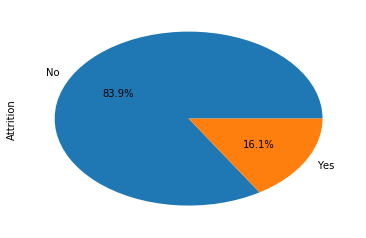

In [21]:
# Inspecting the taerget variable ...
hr_data['Attrition'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

In [22]:
#Class imbalance exists

#### Univariate Analysis

In [23]:
len(hr_data['DailyRate'].unique())

886

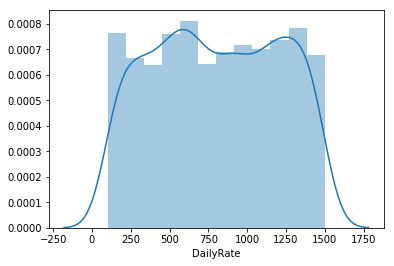

In [24]:
sns.distplot(hr_data['DailyRate'])

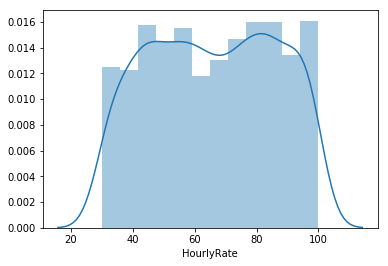

In [25]:
sns.distplot(hr_data['HourlyRate'])

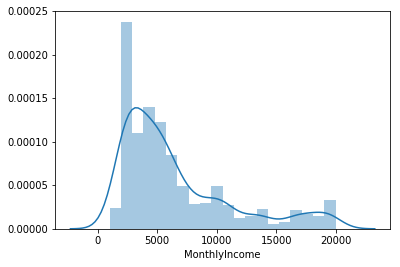

In [26]:
sns.distplot(hr_data['MonthlyIncome'])

In [27]:
# For some numeric variables we will use the countplot, while for some others we will use the distplot..

In [28]:
disc=[]
num_nd=[]
for var in num :
    print(f'Variable : {var}, No. of UniqueValues: {len(hr_data[var].unique())}')
    if len(hr_data[var].unique()) <= 20 :
       disc.append(var)
    else :
       num_nd.append(var)    

Variable : Age, No. of UniqueValues: 43
Variable : DailyRate, No. of UniqueValues: 886
Variable : DistanceFromHome, No. of UniqueValues: 29
Variable : Education, No. of UniqueValues: 5
Variable : EmployeeCount, No. of UniqueValues: 1
Variable : EnvironmentSatisfaction, No. of UniqueValues: 4
Variable : HourlyRate, No. of UniqueValues: 71
Variable : JobInvolvement, No. of UniqueValues: 4
Variable : JobLevel, No. of UniqueValues: 5
Variable : JobSatisfaction, No. of UniqueValues: 4
Variable : MonthlyIncome, No. of UniqueValues: 1349
Variable : MonthlyRate, No. of UniqueValues: 1427
Variable : NumCompaniesWorked, No. of UniqueValues: 10
Variable : PercentSalaryHike, No. of UniqueValues: 15
Variable : PerformanceRating, No. of UniqueValues: 2
Variable : RelationshipSatisfaction, No. of UniqueValues: 4
Variable : StandardHours, No. of UniqueValues: 1
Variable : StockOptionLevel, No. of UniqueValues: 4
Variable : TotalWorkingYears, No. of UniqueValues: 40
Variable : TrainingTimesLastYear, No

In [29]:
num_nd

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

In [30]:
disc

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [31]:
disc.remove('EmployeeCount')
hr_data.drop(columns=['EmployeeCount'],inplace=True)

In [32]:
disc

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

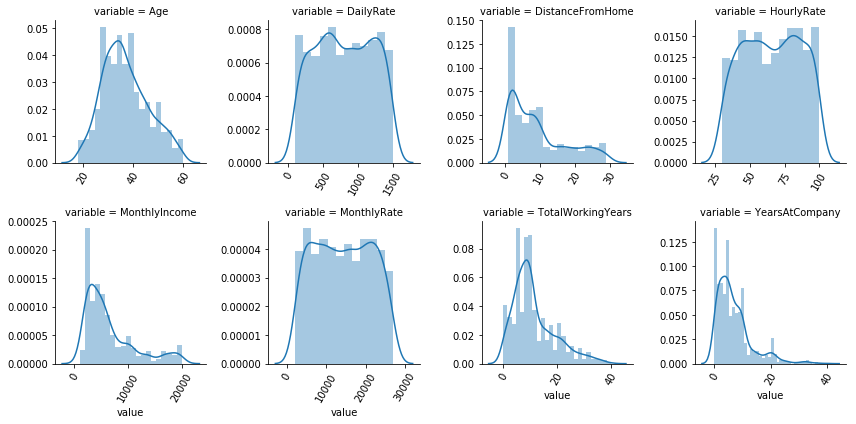

In [33]:
# Plotting the numerical vars..ie vars deemed to be numerical....
num_f=pd.melt(hr_data,value_vars=sorted(num_nd))
g=sns.FacetGrid(num_f,col='variable',sharex=False,sharey=False,col_wrap=4)
g=g.map(sns.distplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
plt.tight_layout()
plt.show()

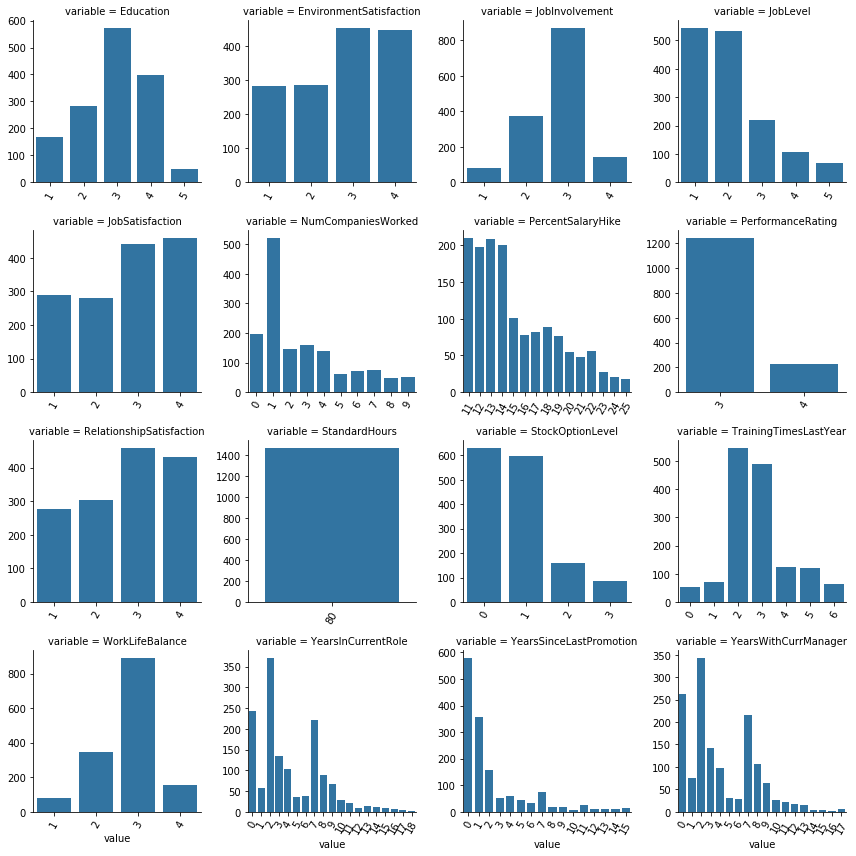

In [34]:
# Plotting the discrete vars..ie vars deemed to be discrete....
disc_f=pd.melt(hr_data,value_vars=sorted(disc))
g=sns.FacetGrid(disc_f,col='variable',sharex=False,sharey=False,col_wrap=4)
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
plt.tight_layout()
plt.show()

In [35]:
print(len(hr_data['StandardHours'].unique()))

1


In [36]:
#Dropping the variable standard hours as it has only 1 value
hr_data.drop(columns=['StandardHours'],inplace=True)

In [37]:
disc.remove('StandardHours')

In [38]:
cat.remove('EmployeeNumber')
cat.remove('Attrition')

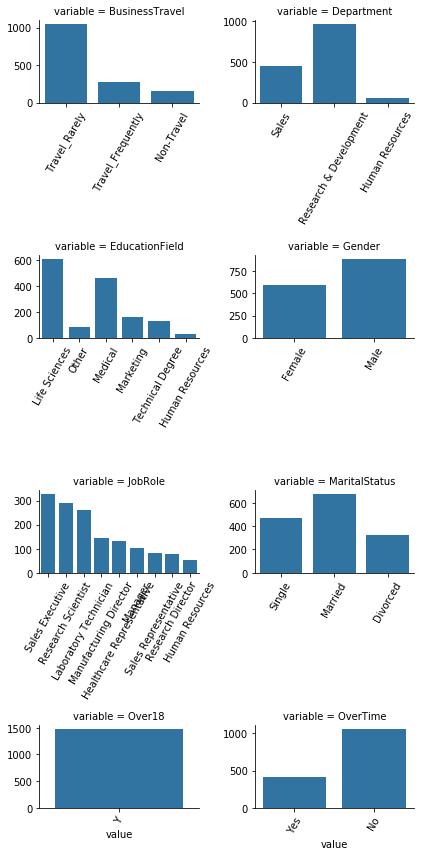

In [39]:
cat_f=pd.melt(hr_data,value_vars=sorted(cat))
g=sns.FacetGrid(cat_f,col='variable',sharex=False,sharey=False,col_wrap=2)
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
plt.tight_layout()
plt.show()

In [40]:
# The variable OverTime has only one value ..'Yes'...
len(hr_data['Over18'].unique())

1

In [41]:
hr_data.drop(columns=['Over18'],inplace=True)


In [42]:
cat.remove('Over18')

In [43]:
# Inspecting rare values in categorical variables..
for var in cat :
    print(var)
    print()
    print(hr_data[var].value_counts(normalize=True))
    print()

BusinessTravel

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

Department

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

EducationField

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

Gender

Male      0.6
Female    0.4
Name: Gender, dtype: float64

JobRole

Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64

MaritalStatus

Married     0.

In [44]:
# Rare values are present in JobRole,EducationField, and Department..only Human Resources is the 'Rare' value in these fields...

#### Bivariate Analysis

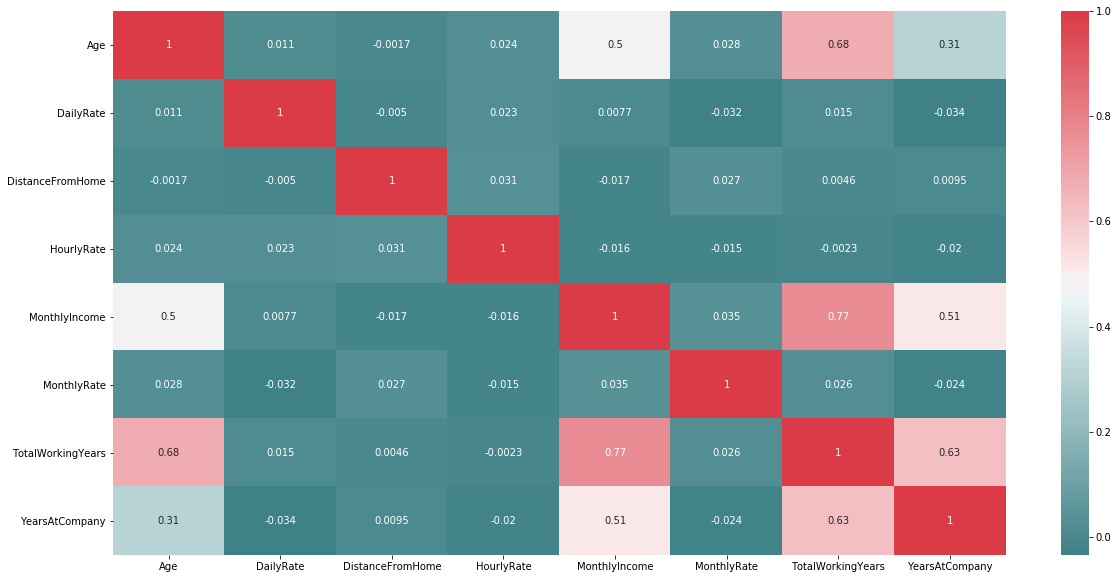

In [45]:
# Exploring correlation among numerical variables
corr_mat=hr_data[num_nd].corr()
fig=plt.figure(figsize=(20,10))
fig.add_subplot(111)
cmap=sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(corr_mat,xticklabels=corr_mat.columns.values,yticklabels=corr_mat.columns.values,cmap=cmap,annot=True)
plt.show()

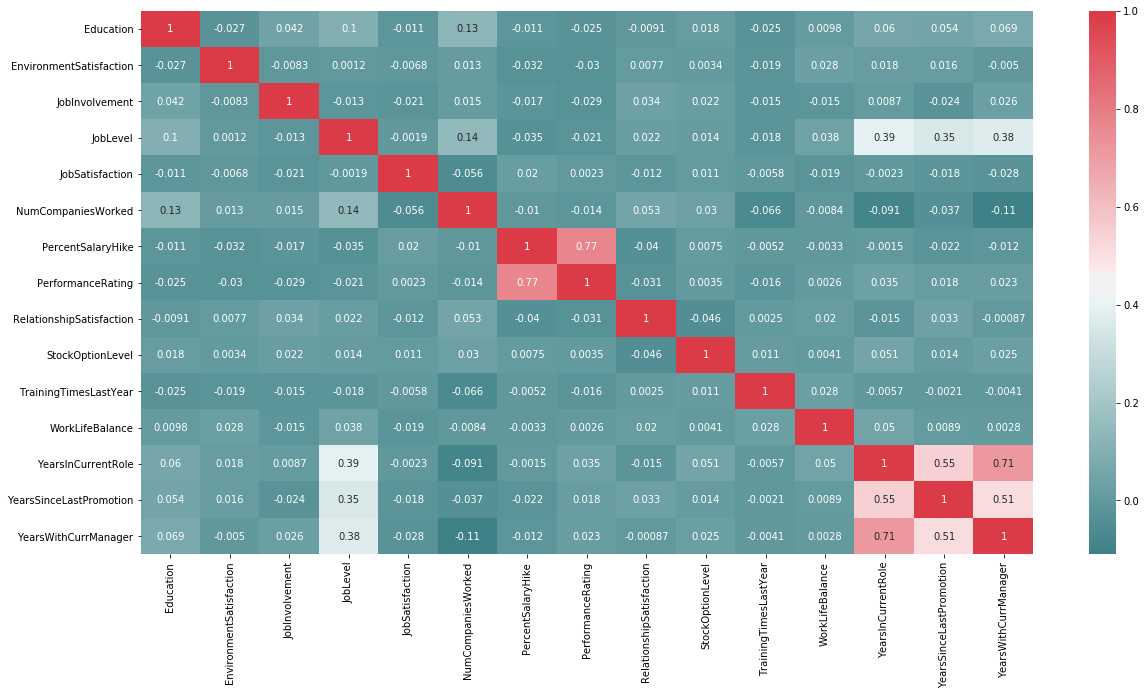

In [46]:
corr_mat=hr_data[disc].corr()
fig=plt.figure(figsize=(20,10))
fig.add_subplot(111)
cmap=sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(corr_mat,xticklabels=corr_mat.columns.values,yticklabels=corr_mat.columns.values,cmap=cmap,annot=True)
plt.show()

In [47]:
# As seen from the above plots some features are correlated

In [48]:
hr_data.Attrition.replace({'Yes':1,'No':0},inplace=True)

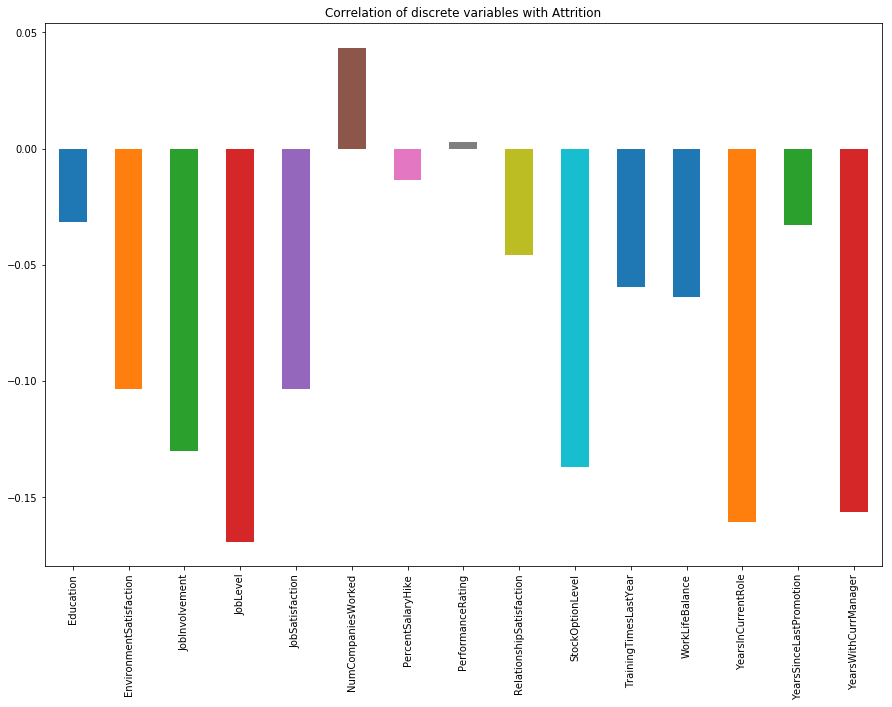

In [49]:
hr_data[disc].corrwith(hr_data['Attrition']).plot(kind='bar',title='Correlation of discrete variables with Attrition',figsize=(15,10))

In [50]:
# Some variables strongly affect Attrition...For example if en employee is comfortable with his/her manager (YearsWithCurrManager is more), then he/she is likely to stay back.

In [51]:
pd.crosstab(index=hr_data['Attrition'],columns=hr_data['BusinessTravel'])

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,138,208,887
1,12,69,156


In [52]:
from scipy.stats import chi2_contingency

In [53]:
# We will use chisq tests to determine which categorical variables are significant

In [54]:
for var in cat :
    chisq=chi2_contingency(pd.crosstab(index=hr_data['Attrition'],columns=hr_data[var]))
    if chisq[1] < 0.05 :
        print(f'{var} is significant for Attrition ')
        print(f'p value {chisq[1]}')
        print()
    else :
        print(f'{var} is not significant for Attrition ')
        print(f'p value {chisq[1]}')
        print()      

BusinessTravel is significant for Attrition 
p value 5.608614476449931e-06

Department is significant for Attrition 
p value 0.004525606574479633

EducationField is significant for Attrition 
p value 0.006773980139025222

Gender is not significant for Attrition 
p value 0.29057244902890855

JobRole is significant for Attrition 
p value 2.752481638050657e-15

MaritalStatus is significant for Attrition 
p value 9.45551106034083e-11

OverTime is significant for Attrition 
p value 8.15842372153832e-21



In [55]:
# Looks like all the categorical variables are significant

In [56]:
# Encoding the categorical variables
hr_data=pd.get_dummies(hr_data)

In [57]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1

In [58]:
# Avoiding the dummy variable trap...
hr_data.drop(columns=['BusinessTravel_Non-Travel','JobRole_Human Resources','MaritalStatus_Divorced','OverTime_Yes','Gender_Female','EducationField_Human Resources','Department_Human Resources'],inplace=True)

In [59]:
hr_data['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(hr_data[hr_data.columns.difference(['EmployeeNumber','Attrition'])],hr_data['Attrition'],test_size=0.3,random_state=10)

In [62]:
# Tackling class imbalance using SMOTE
oversampling=SMOTE(random_state=0)

In [63]:
SMOTE_train,SMOTE_target=oversampling.fit_sample(X_train,y_train)

In [64]:
SMOTE_train=pd.DataFrame(SMOTE_train,columns=X_train.columns)

#### Predictive Models

##### Applying Logistic Regression ( with both oversampling and undersampling)

###### We will use SMOTE to oversample the minority class. We will also create another data set that will downsample the majority class such that the no. of samples for both classes are equal

##### Logistic Regression with SMOTE 

In [65]:
#Applying Logistic Regression
from sklearn.metrics import classification_report,roc_curve,auc,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_validate

In [66]:
parameter_grid={'C':[0.0001,0.001,0.01,.1,1,10],
               'penalty':['l1','l2']}
log_reg=LogisticRegression()

In [67]:
classifier_logreg=GridSearchCV(estimator=log_reg,param_grid=parameter_grid,n_jobs=-1,scoring='roc_auc',cv=10)

In [68]:
classifier_logreg.fit(SMOTE_train,SMOTE_target)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [69]:
classifier_logreg.best_params_

{'C': 10, 'penalty': 'l1'}

In [70]:
label_pred_logit=classifier_logreg.best_estimator_.predict(X_test)

In [71]:
fpr,tpr,thresh=roc_curve(y_test,label_pred_logit)

In [72]:
auc(fpr,tpr)

0.7391456582633052

In [73]:
cls_report_logreg=classification_report(y_test,label_pred_logit)

In [74]:
print(cls_report_logreg)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       357
           1       0.62      0.56      0.59        84

    accuracy                           0.85       441
   macro avg       0.76      0.74      0.75       441
weighted avg       0.85      0.85      0.85       441



In [75]:
#Though we have obtained 85% accuracy, the recall,and precision scores are quite less where Attrition=1...We can downsample the majority class, and create a sample that has equal number of 1 s and zeroes.

In [76]:
# Or we can put a cost on misclassifying a 1 as a 0....

##### Logistic Regression after downsampling ( creating a balanced data set)

In [77]:
# Creating a balanced data set..

In [78]:
hr_att=hr_data[hr_data.Attrition==1]

In [79]:
hr_no_att=hr_data[hr_data.Attrition==0]

In [80]:
hr_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 1461
Data columns (total 46 columns):
Age                                  237 non-null int64
Attrition                            237 non-null int64
DailyRate                            237 non-null int64
DistanceFromHome                     237 non-null int64
Education                            237 non-null int64
EmployeeNumber                       237 non-null int64
EnvironmentSatisfaction              237 non-null int64
HourlyRate                           237 non-null int64
JobInvolvement                       237 non-null int64
JobLevel                             237 non-null int64
JobSatisfaction                      237 non-null int64
MonthlyIncome                        237 non-null int64
MonthlyRate                          237 non-null int64
NumCompaniesWorked                   237 non-null int64
PercentSalaryHike                    237 non-null int64
PerformanceRating                    237 non-null int6

In [81]:
hr_no_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 1 to 1469
Data columns (total 46 columns):
Age                                  1233 non-null int64
Attrition                            1233 non-null int64
DailyRate                            1233 non-null int64
DistanceFromHome                     1233 non-null int64
Education                            1233 non-null int64
EmployeeNumber                       1233 non-null int64
EnvironmentSatisfaction              1233 non-null int64
HourlyRate                           1233 non-null int64
JobInvolvement                       1233 non-null int64
JobLevel                             1233 non-null int64
JobSatisfaction                      1233 non-null int64
MonthlyIncome                        1233 non-null int64
MonthlyRate                          1233 non-null int64
NumCompaniesWorked                   1233 non-null int64
PercentSalaryHike                    1233 non-null int64
PerformanceRating                    1

In [82]:
hr_no_att=hr_no_att.sample(hr_att.shape[0],random_state=10)

In [83]:
hr_balanced=pd.concat([hr_no_att,hr_att])

In [84]:
hr_balanced.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_No
149,19,0,1181,3,1,201,2,79,3,1,...,1,0,0,0,0,0,0,0,1,1
833,27,0,199,6,3,1162,4,55,2,1,...,0,0,0,0,1,0,0,1,0,1
1285,46,0,849,26,2,1801,2,98,2,2,...,0,0,0,0,0,1,0,0,1,1
934,25,0,266,1,3,1303,4,40,3,1,...,0,0,0,0,1,0,0,0,1,1
644,31,0,1222,11,4,895,4,48,3,1,...,0,0,0,0,1,0,0,1,0,0


In [85]:
hr_balanced=hr_balanced.sample(frac=1,random_state=10)

In [86]:
hr_balanced.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_No
83,38,0,573,6,3,107,2,79,1,2,...,0,0,0,0,1,0,0,0,0,0
157,58,0,1145,9,3,214,2,75,2,1,...,0,0,0,0,1,0,0,1,0,0
435,33,1,1277,15,1,582,2,56,3,3,...,0,1,0,0,0,0,0,1,0,0
513,20,1,1362,10,1,701,4,32,3,1,...,0,0,0,0,1,0,0,0,1,0
288,26,1,1449,16,4,394,1,45,3,1,...,1,0,0,0,0,0,0,0,0,0


In [87]:
hr_bl_train,hr_bl__test,target_train,target_test=train_test_split(hr_balanced[hr_balanced.columns.difference(['EmployeeNumber','Attrition'])],hr_balanced['Attrition'],test_size=0.3,random_state=10)

In [88]:
#Applying Logistic Regression
parameter_grid={'C':[0.0001,0.001,0.01,.1,1,10],
               'penalty':['l1','l2']}
log_reg=LogisticRegression()

classifier_logreg=GridSearchCV(estimator=log_reg,param_grid=parameter_grid,n_jobs=-1,scoring='accuracy',cv=10)

classifier_logreg.fit(hr_bl_train,target_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [89]:
classifier_logreg.best_params_

{'C': 10, 'penalty': 'l2'}

In [90]:
logreg_predict=classifier_logreg.best_estimator_.predict(hr_bl__test)

In [91]:
fpr,tpr,thresh=roc_curve(target_test,logreg_predict)

In [92]:
auc(fpr,tpr)

0.7714596518987342

In [93]:
print(classification_report(target_test,logreg_predict))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        79
           1       0.69      0.86      0.76        64

    accuracy                           0.76       143
   macro avg       0.77      0.77      0.76       143
weighted avg       0.78      0.76      0.76       143



In [94]:
# The accuracy has come down....but area under the curve has improved so has the recall , precision for Attrition=1

In [95]:
#For these class imbalanced problems for Employee Attrition ...a penalty should be imposed on classifying a 1 (Attrition ) as 0 (No Attrition)

##### Random Forests with balanced data set ( majority class downsampled)

In [96]:
import time
import numpy as np

In [97]:
parameter_grid={'n_estimators':np.arange(200,600,100),
                'min_samples_leaf':[2,5,10],
                'min_samples_split':[2,5,10],
               }

print(parameter_grid)
rf=RandomForestClassifier(n_jobs=-1,random_state=10)
classifier_rf=GridSearchCV( estimator=rf,
                     param_grid=parameter_grid,
                          scoring='accuracy',
                          cv=5) 
                         
t1=time.time()
classifier_rf.fit(hr_bl_train,target_train)
t2=time.time()
print(t2-t1)

{'n_estimators': array([200, 300, 400, 500]), 'min_samples_leaf': [2, 5, 10], 'min_samples_split': [2, 5, 10]}
65.94231057167053


In [98]:
classifier_rf.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 400}

In [99]:
parameter_grid={'n_estimators':[350,400,450,1000],
                'min_samples_leaf':[2,5,10],
                'min_samples_split':[2,5,10],
               }

print(parameter_grid)
rf=RandomForestClassifier(n_jobs=-1,random_state=10)
classifier_rf=GridSearchCV( estimator=rf,
                     param_grid=parameter_grid,
                          scoring='accuracy',
                          cv=5) 
                         
t1=time.time()
classifier_rf.fit(hr_bl_train,target_train)
t2=time.time()
print(t2-t1)

{'n_estimators': [350, 400, 450, 1000], 'min_samples_leaf': [2, 5, 10], 'min_samples_split': [2, 5, 10]}
91.2315468788147


In [100]:
classifier_rf.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 350}

In [101]:
#Tuning Max_depth
rf=RandomForestClassifier(n_estimators=350,min_samples_leaf=2,min_samples_split=10,n_jobs=-1,random_state=10)
max_d=np.arange(10,110,10)
#max_d.append(None)
parameter_grid={'max_depth':max_d}
classifier_rf=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='accuracy',cv=5,verbose=1)  

t1=time.time()
classifier_rf.fit(hr_bl_train,target_train)
t2=time.time()

print(t2-t1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.3s finished


18.713313341140747


In [102]:
classifier_rf.best_params_

{'max_depth': 10}

In [103]:
#Honing in on Max Depth
rf=RandomForestClassifier(n_estimators=350,min_samples_leaf=2,min_samples_split=10,n_jobs=-1,random_state=10)
max_d=[10]
max_d.append(None)
parameter_grid={'max_depth':max_d}
classifier_rf=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='accuracy',cv=5,verbose=1)  

t1=time.time()
classifier_rf.fit(hr_bl_train,target_train)
t2=time.time()

print(t2-t1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.7s finished


4.125391721725464


In [104]:
classifier_rf.best_params_

{'max_depth': 10}

In [105]:
parameter_grid={'bootstrap':[True,False],
               'max_features':['auto','sqrt'],
               'criterion':['gini','entropy']}
rf=RandomForestClassifier(n_estimators=350, n_jobs=-1,min_samples_leaf=2, min_samples_split=10,max_depth=10,random_state=10)
classifier_rf=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='accuracy',cv=5)

t1=time.time()
classifier_rf.fit(hr_bl_train,target_train)
t2=time.time()

print(t2-t1)

15.526328325271606


In [106]:
classifier_rf.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto'}

In [107]:
rf_pred=classifier_rf.best_estimator_.predict(hr_bl__test)

In [108]:
fpr,tpr,thresh=roc_curve(target_test,rf_pred)

In [109]:
auc(fpr,tpr)

0.7212223101265823

In [110]:
print(classification_report(target_test,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.65      0.71        79
           1       0.65      0.80      0.71        64

    accuracy                           0.71       143
   macro avg       0.72      0.72      0.71       143
weighted avg       0.73      0.71      0.71       143



In [111]:
# Logistic Regression outdoes RandomForest on the balanced data set!!

##### RandomForest with SMOTEd data 

In [112]:
# Trying Random Forest on SMOTEd data set
parameter_grid={'n_estimators':np.arange(200,600,100),
                'min_samples_leaf':[2,5,10],
                'min_samples_split':[2,5,10],
               }

print(parameter_grid)
rf=RandomForestClassifier(n_jobs=-1,random_state=0)
classifier_rf_smote=GridSearchCV( estimator=rf,
                     param_grid=parameter_grid,
                          scoring='accuracy',
                          cv=5) 
                         
t1=time.time()
classifier_rf_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()
print(t2-t1)

{'n_estimators': array([200, 300, 400, 500]), 'min_samples_leaf': [2, 5, 10], 'min_samples_split': [2, 5, 10]}
81.35230851173401


In [113]:
 classifier_rf_smote.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}

In [114]:
parameter_grid={'n_estimators':[250,300,350,1000],
                'min_samples_leaf':[2,5,10],
                'min_samples_split':[2,5,10],
               }

print(parameter_grid)
rf=RandomForestClassifier(n_jobs=-1,random_state=0)
classifier_rf_smote=GridSearchCV( estimator=rf,
                     param_grid=parameter_grid,
                          scoring='accuracy',
                          cv=5) 
                         
t1=time.time()
classifier_rf_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()
print(t2-t1)

{'n_estimators': [250, 300, 350, 1000], 'min_samples_leaf': [2, 5, 10], 'min_samples_split': [2, 5, 10]}
104.95068860054016


In [115]:
classifier_rf_smote.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}

In [116]:
#Tuning Max_depth
rf=RandomForestClassifier(n_estimators=1000,min_samples_leaf=2,min_samples_split=2,n_jobs=-1,random_state=10)
max_d=np.arange(10,110,10)
#max_d.append(None)
parameter_grid={'max_depth':max_d}
classifier_rf_smote=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='accuracy',cv=5,verbose=1)  

t1=time.time()
classifier_rf_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()

print(t2-t1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.5s finished


59.91071891784668


In [117]:
classifier_rf_smote.best_params_

{'max_depth': 20}

In [118]:
rf=RandomForestClassifier(n_estimators=1000,min_samples_leaf=2,min_samples_split=2,n_jobs=-1,random_state=10)
max_d=[20]
max_d.append(None)
parameter_grid={'max_depth':max_d}
classifier_rf_smote=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='accuracy',cv=5,verbose=1)  

t1=time.time()
classifier_rf_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()

print(t2-t1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.8s finished


13.189852237701416


In [119]:
classifier_rf_smote.best_params_

{'max_depth': 20}

In [120]:
parameter_grid={'bootstrap':[True,False],
               'max_features':['auto','sqrt'],
               'criterion':['gini','entropy']}
rf=RandomForestClassifier(n_estimators=1000, n_jobs=-1,min_samples_leaf=2, min_samples_split=2,max_depth=20,random_state=10)
classifier_rf_smote=GridSearchCV(estimator=rf,param_grid=parameter_grid,scoring='accuracy',cv=5)

t1=time.time()
classifier_rf_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()

print(t2-t1)

52.061795473098755


In [121]:
classifier_rf_smote.best_params_

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto'}

In [122]:
rf_pred_smote=classifier_rf_smote.best_estimator_.predict(X_test)

In [123]:
fpr,tpr,thresh=roc_curve(y_test,rf_pred_smote)

In [124]:
auc(fpr,tpr)

0.6127450980392156

In [125]:
print(classification_report(y_test,rf_pred_smote))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       357
           1       0.63      0.26      0.37        84

    accuracy                           0.83       441
   macro avg       0.74      0.61      0.64       441
weighted avg       0.81      0.83      0.80       441



In [126]:
# We see that the accuracy is good, but ROC is reduced to 0.61...moreover recall is very low (.32) when Attrition occurs (target=1)

###### XGBOOST with balanced data

In [127]:
xgb_model=xgboost.XGBClassifier(n_estimators=1000,objective='binary:logistic')

In [128]:
#Starting tuning with max_depth and min_child_weight
params=dict(max_depth=np.arange(3,11,2),min_child_weight=np.arange(5,11,2))
xgb_classifier=GridSearchCV(estimator=xgb_model, param_grid=params, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=1)
t1=time.time()
xgb_classifier.fit(hr_bl_train,target_train)
t2=time.time()

print(t2-t1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.8s finished


5.270762205123901


In [129]:
xgb_classifier.best_params_

{'max_depth': 3, 'min_child_weight': 9}

In [130]:
#Honing in...
params=dict(max_depth=[3,4,6,8],min_child_weight=[6,8,9,10])
xgb_classifier=GridSearchCV(estimator=xgb_model, param_grid=params, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=1)
t1=time.time()
xgb_classifier.fit(hr_bl_train,target_train)
t2=time.time()

print(t2-t1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.1s finished


6.554605007171631


In [131]:
xgb_classifier.best_params_

{'max_depth': 3, 'min_child_weight': 9}

In [132]:
xgb_classifier.cv_results_['params']

[{'max_depth': 3, 'min_child_weight': 6},
 {'max_depth': 3, 'min_child_weight': 8},
 {'max_depth': 3, 'min_child_weight': 9},
 {'max_depth': 3, 'min_child_weight': 10},
 {'max_depth': 4, 'min_child_weight': 6},
 {'max_depth': 4, 'min_child_weight': 8},
 {'max_depth': 4, 'min_child_weight': 9},
 {'max_depth': 4, 'min_child_weight': 10},
 {'max_depth': 6, 'min_child_weight': 6},
 {'max_depth': 6, 'min_child_weight': 8},
 {'max_depth': 6, 'min_child_weight': 9},
 {'max_depth': 6, 'min_child_weight': 10},
 {'max_depth': 8, 'min_child_weight': 6},
 {'max_depth': 8, 'min_child_weight': 8},
 {'max_depth': 8, 'min_child_weight': 9},
 {'max_depth': 8, 'min_child_weight': 10}]

In [133]:
# Tuning colsample_bytree, and subsample...
params=dict(colsample_bytree=np.arange(0.3,1,.1),subsample=np.arange(0.8,1,.1))
print(params)
xgb_classifier=GridSearchCV(estimator=xgboost.XGBClassifier(n_estimators=1000,min_child_weight=9,max_depth=3), param_grid=params, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=1)
t1=time.time()
xgb_classifier.fit(hr_bl_train,target_train)
t2=time.time()

print(t2-t1)

{'colsample_bytree': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'subsample': array([0.8, 0.9])}
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.8s finished


4.175626277923584


In [134]:
xgb_classifier.best_params_

{'colsample_bytree': 0.7000000000000002, 'subsample': 0.9}

In [135]:
# Now, let us tune the learning rate
params=dict(learning_rate=[0.3,0.2,0.1,0.05,0.01])
print(params)
xgb_classifier=GridSearchCV(estimator=xgboost.XGBClassifier(n_estimators=1000,min_child_weight=9,max_depth=3,colsample_bytree=0.7,subsample=0.9), param_grid=params, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=1)
t1=time.time()
xgb_classifier.fit(hr_bl_train,target_train)
t2=time.time()

print(t2-t1)

{'learning_rate': [0.3, 0.2, 0.1, 0.05, 0.01]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.7s finished


2.020892381668091


In [136]:
xgb_classifier.best_params_

{'learning_rate': 0.1}

In [137]:
xgb_classifier.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.7, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=9, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.9)

In [138]:
xgb_pred=xgb_classifier.best_estimator_.predict(hr_bl__test)

In [139]:
fpr,tpr,thresh=roc_curve(target_test,xgb_pred)

In [140]:
auc(fpr,tpr)

0.7450553797468354

In [141]:
print(classification_report(target_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        79
           1       0.68      0.78      0.73        64

    accuracy                           0.74       143
   macro avg       0.74      0.75      0.74       143
weighted avg       0.75      0.74      0.74       143



In [142]:
# For the balanced data set ,Logistic Regression is still the best, followed by XGBoost, and then Random Forest

##### XGBoost on the SMOTEd data

In [143]:
xgb_model=xgboost.XGBClassifier(n_estimators=1000,objective='binary:logistic')

In [144]:
#Starting tuning with max_depth and min_child_weight
params=dict(max_depth=np.arange(3,11,2),min_child_weight=np.arange(5,11,2))
xgb_classifier_smote=GridSearchCV(estimator=xgb_model, param_grid=params, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=1)
t1=time.time()
xgb_classifier_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()

print(t2-t1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   21.5s finished


23.952638149261475


In [145]:
xgb_classifier_smote.best_params_

{'max_depth': 5, 'min_child_weight': 5}

In [146]:
#Honing in...
params=dict(max_depth=[3,4,5,6,8],min_child_weight=[5,6,8,9,10])
xgb_classifier_smote=GridSearchCV(estimator=xgb_model, param_grid=params, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=1)
t1=time.time()
xgb_classifier_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()

print(t2-t1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   43.1s finished


45.55534315109253


In [147]:
xgb_classifier_smote.best_params_

{'max_depth': 5, 'min_child_weight': 5}

In [148]:
# Tuning colsample_bytree, and subsample...
params=dict(colsample_bytree=np.arange(0.3,1,.1),subsample=np.arange(0.8,1,.1))
print(params)
xgb_classifier_smote=GridSearchCV(estimator=xgboost.XGBClassifier(n_estimators=1000,min_child_weight=5,max_depth=5), param_grid=params, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=1)
t1=time.time()
xgb_classifier_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()

print(t2-t1)

{'colsample_bytree': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'subsample': array([0.8, 0.9])}
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   19.6s finished


21.904592990875244


In [149]:
xgb_classifier_smote.best_params_

{'colsample_bytree': 0.9000000000000001, 'subsample': 0.9}

In [150]:
# Now, let us tune the learning rate
params=dict(learning_rate=[0.3,0.2,0.1,0.05,0.01])
print(params)
xgb_classifier_smote=GridSearchCV(estimator=xgboost.XGBClassifier(n_estimators=1000,min_child_weight=5,max_depth=5,colsample_bytree=0.9,subsample=0.9), param_grid=params, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=1)
t1=time.time()
xgb_classifier_smote.fit(SMOTE_train,SMOTE_target)
t2=time.time()

print(t2-t1)

{'learning_rate': [0.3, 0.2, 0.1, 0.05, 0.01]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.4s finished


12.69083547592163


In [151]:
xgb_classifier_smote.best_params_

{'learning_rate': 0.1}

In [152]:
xgb_pred_smote=xgb_classifier_smote.predict(X_test)

In [153]:
fpr,tpr,thresh=roc_curve(y_test,xgb_pred_smote)

In [154]:
auc(fpr,tpr)

0.6894257703081232

In [155]:
print(classification_report(y_test,xgb_pred_smote))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       357
           1       0.63      0.44      0.52        84

    accuracy                           0.84       441
   macro avg       0.75      0.69      0.71       441
weighted avg       0.83      0.84      0.83       441



In [158]:
## As again with SMOTEd data sets, the accuracy is high..but the recall is very low for cases where Attrition is 1.....

##### Selecting important features based on the Logistic Regression model ( that was built using the balanced data set)

In [188]:
#We will select the important features from the Logistic regression model on the balanced data set..
from sklearn.feature_selection import RFE

In [189]:
rfe=RFE(estimator=LogisticRegression(C=10,penalty='l2'),n_features_to_select=10)

In [190]:
rfe_fit=rfe.fit(hr_data[hr_data.columns.difference(['EmployeeNumber','Attrition'])],hr_data['Attrition'])

In [191]:
hr_data.columns.difference(['EmployeeNumber','Attrition'])[rfe_fit.support_].values


array(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'JobRole_Healthcare Representative',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'MaritalStatus_Single',
       'OverTime_No'], dtype=object)

### Conclusion  

We saw that though the SMOTE data set had a higher accuracy , the balanced data set had better 'recall' statistics for the 1s..ie,where Attrition occurs. This is true for all the models.  

LogisticRegression on the balanced data set had the best recall statistics (86%)